# Classification of Malware with PE headers

#### Problem Statement

Malware is one of the top most obstructions for expansion and growth of digital acceptance among the users. Both enterprises and common users are struggling to get protected from the malware in cyberspace, which emphasizes the importance of developing efficient methods of malware detection.

#### Objective

- Build a machine learning model to classify a sample as benign - 0 or malware - 1.  
- And share a simple way to solve this classification problem. 

### Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Import Data

In [2]:
train_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/clamp/train_set_label.csv")

### Simple Exploratory Analysis

Visualizing the distribution of variables of this dataset.

In [3]:
train_data.head(3)

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,class
0,23117,144,3,0,4,0,65535,0,184,0,...,115397,2,33792,1048576,4096,1048576,4096,0,16,1
1,23117,144,3,0,4,0,65535,0,184,0,...,0,2,0,10485760,40960,6291456,16384,0,16,1
2,23117,144,3,0,4,0,65535,0,184,0,...,0,2,0,1048576,4096,1048576,4096,0,16,0


Checking the type of each variables and if there are any missing values.

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3888 entries, 0 to 3887
Data columns (total 56 columns):
e_magic                        3888 non-null int64
e_cblp                         3888 non-null int64
e_cp                           3888 non-null int64
e_crlc                         3888 non-null int64
e_cparhdr                      3888 non-null int64
e_minalloc                     3888 non-null int64
e_maxalloc                     3888 non-null int64
e_ss                           3888 non-null int64
e_sp                           3888 non-null int64
e_csum                         3888 non-null int64
e_ip                           3888 non-null int64
e_cs                           3888 non-null int64
e_lfarlc                       3888 non-null int64
e_ovno                         3888 non-null int64
e_res                          0 non-null float64
e_oemid                        3888 non-null int64
e_oeminfo                      3888 non-null int64
e_res2                     

We can check that the columns 'e_res' and 'e_res2' don't have any values so let's remove them from our dataset.

In [5]:
train_data = train_data.drop(['e_res', 'e_res2'], axis = 1)

Separating dependant and independent variables.

In [6]:
X = train_data.drop('class', axis = 1) 
y = train_data['class'] 

Separating our dataset using Scikit-Learn package. We will be separating 70% to train and 30% to test.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 42)

In this dataset i have used the Robust Scaler instead of standarization or normalization, it had a better performance in this data. If you want to know more about this type of scaler visit this website https://www.geeksforgeeks.org/standardscaler-minmaxscaler-and-robustscaler-techniques-ml/

In [8]:
from sklearn.preprocessing import RobustScaler # When there are manyt outliers
scaler = RobustScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = (X_train.columns))
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = (X_test.columns))
#X = pd.DataFrame(scaler.fit_transform(X), columns = (X.columns))


### Feature Selection

#### Variance  
In this next phase we will remove some variables which don't have much variance in their values.

In [9]:
from sklearn.feature_selection import VarianceThreshold
X_var = VarianceThreshold(threshold=0.2)
X_var.fit(X)

for feature in zip(X.columns, X_var.variances_):
    print(feature)
    
sum(X_var.get_support())

list_var = list(X.columns[X_var.get_support()])
X_train = X_train[list_var]

('e_magic', 0.0)
('e_cblp', 349912.86856572493)
('e_cp', 5.249250357753731)
('e_crlc', 0.0)
('e_cparhdr', 0.1275505829903978)
('e_minalloc', 4326.681374525815)
('e_maxalloc', 26988777.046122447)
('e_ss', 1103849.3484224968)
('e_sp', 1098506.8353144743)
('e_csum', 0.0015421514335551827)
('e_ip', 364648.0997211402)
('e_cs', 1373342.3489288948)
('e_lfarlc', 27.207776592321636)
('e_ovno', 42.78448407254992)
('e_oemid', 54.96450081447182)
('e_oeminfo', 0.04214905205845993)
('e_lfanew', 2328.802383401921)
('Machine', 1788749.4904740122)
('NumberOfSections', 3.5986447034454434)
('CreationYear', 38.76873119940643)
('PointerToSymbolTable', 2476227538.4572816)
('NumberOfSymbols', 28507.913489683888)
('SizeOfOptionalHeader', 0.3944520652339582)
('Characteristics', 67579161.9620961)
('Magic', 109.84411436899862)
('MajorLinkerVersion', 47.97869989330895)
('MinorLinkerVersion', 116.81583826303155)
('SizeOfCode', 411797647345.52075)
('SizeOfInitializedData', 5378138530169.864)
('SizeOfUninitializedDa

#### Importance 
Now we will check the importance of features and remove the least important ones.

In [10]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

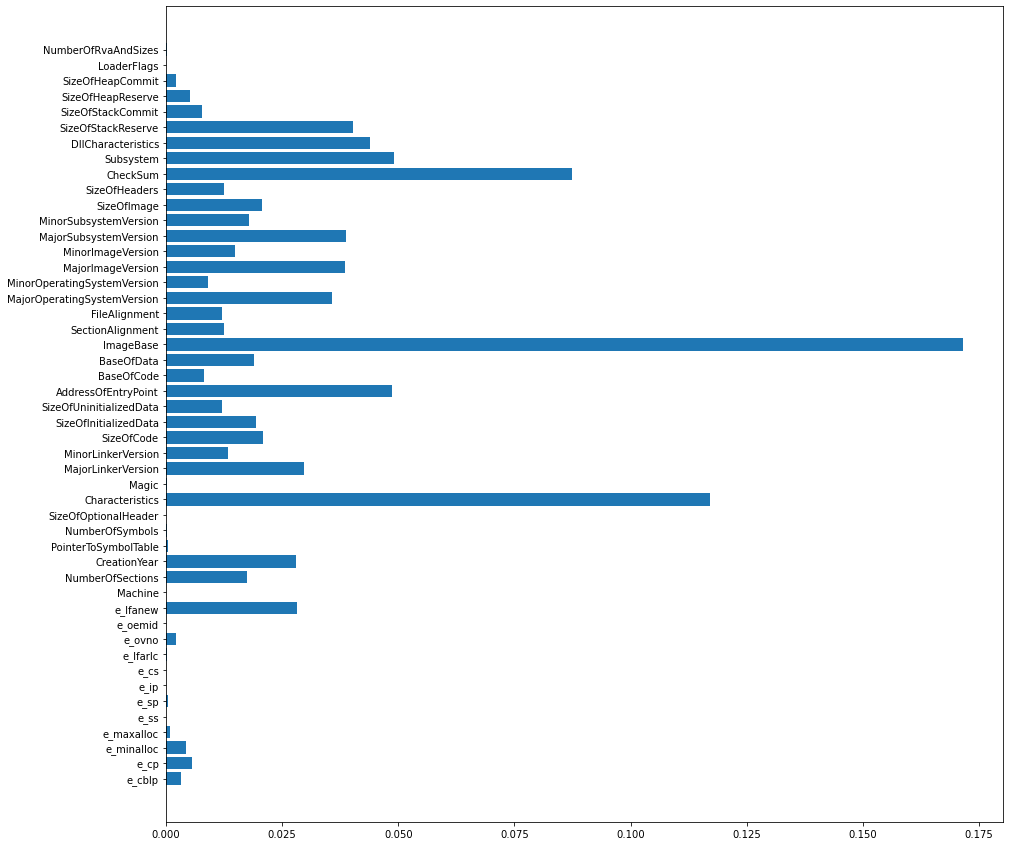

In [11]:
plt.figure(figsize = (15,15))
plt.barh(X_train.columns, rf.feature_importances_)

plt.show()

In [12]:
imp_list = ['NumberOfRvaAndSizes', 'LoaderFlags', 'Magic', 'SizeOfOptionalHeader', 'NumberOfSymbols', 'PointerToSymbolTable',
           'Machine', 'e_oemid', 'e_lfarlc', 'e_cs', 'e_ip', 'e_sp', 'e_ss', 'e_maxalloc']

In [13]:
X_train = X_train.drop(imp_list, axis=1)

### Building a ML Model

Through my search for the best ML algorithm for this case i have found that RandomForest, ExtraTrees and XGBoost where the ones that had better scores, also used RandomizedSearchCV of sklearn.model_selection package to optimize my hyperparameters.  
Learn more about this hyperparameter tuning tool on the official page of Scikit Learn  
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

In [14]:
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.02, max_depth=6, subsample=0.9, colsample_bytree=1)

In [15]:
xgb.fit(X_train, y_train)

[20:06:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [18]:
X_test = X_test[list_var]
X_test = X_test.drop(imp_list, axis=1)

In [19]:
pred = xgb.predict(X_test)

In [20]:
from sklearn.metrics import f1_score

In [21]:
print('F1 Score is: ', f1_score(y_test, pred))

F1 Score is:  0.9731925264012998


### Predicting with test data

In [22]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/clamp/test_set_label.csv')

In [23]:
test_data.drop(['e_res', 'e_res2'], axis = 1)
test_data = test_data[list_var]
test_data = test_data.drop(imp_list, axis=1)

In [24]:
target = xgb.predict(test_data)

In [25]:
res = pd.DataFrame(target) 
res.columns = ["prediction"]
res.to_csv("XGB_submission.csv", index=False, float_format = str)